In [45]:
%pylab inline
import scipy.io
from sklearn import svm
DEBUG=True

Populating the interactive namespace from numpy and matplotlib


__Problem 1.__ Train a linear SVM using raw pixels as features. Plot the error rate on a validation set versus the number of training ex- amples that you used to train your classifier. Make sure you set aside 10,000 training images as a validation set. The number of training ex- amples in your experiment should be 100, 200, 500, 1,000, 2,000, 5,000, and 10,000. At this stage, you should expect accuracies between 70% and 90%.


In [46]:
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']

In [72]:
#Flatten the 28x28 images into 784 pixel long vectors 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,i].flatten())
train_img_flat= np.array(train_img_flat)

To debug and verify that the data partitioning is preserves a fairly uniform number of sample for each digit, I plot the histogram of the labels to visually verify that the histogram is approximately flat (i.e. uniform).

In [73]:
# num_labels = plt.hist(train_label[:,0])

In [76]:
# shape(train_img_flat1)

In [77]:
# train_img_flat = train_img.reshape((train_img.shape[2], -1))

Setting aside 10,000 images for validation 

Since this data is sorted , we need to pick randomly from the sample 

In [78]:
#get a list of 10100 unique random numbers for indexing 
N=1000
num_verification = 10000
s = set()
while len(s) < N+num_verification:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

In [79]:
# plt.hist(rand_idx[:N])

In [80]:
shape(train_img_flat[0])

(784,)

In [81]:
train_subset = []
labels_subset = []
for i in rand_idx[:N]:
    train_subset.append(train_img_flat[i])
    labels_subset.append(train_label[:,0][i])
train_subset = np.array(train_subset)
labels_subset = np.array(labels_subset)
if (DEBUG) : print shape(train_subset)
if (DEBUG) :print shape(labels_subset)

(1000, 784)
(1000,)


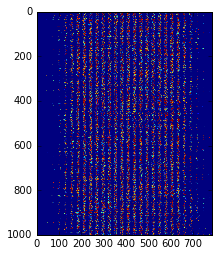

In [82]:
plt.imshow(train_subset)

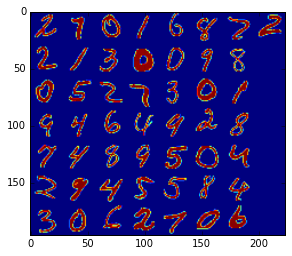

In [83]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,1000))[:,:,:50]))

In [34]:
labels_subset[:50]

array([2, 1, 0, 1, 5, 9, 7, 3, 6, 9, 0, 7, 3, 1, 9, 7, 5, 3, 0, 5, 6, 0, 5,
       6, 9, 2, 2, 1, 3, 8, 9, 5, 6, 0, 8, 0, 6, 7, 7, 0, 0, 5, 4, 7, 3, 1,
       3, 7, 4, 1], dtype=uint8)

In [96]:
# num_labels_subset = plt.hist(labels_subset)

In [102]:
shape(train_data)

(9000, 784)

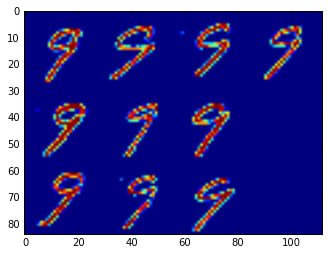

In [110]:
plt.imshow(montage_images(train_img[:,:,-10:]))

In [130]:
#Creating 10000 verification subset 
verify_train_subset = []
verify_labels_subset = []
for i in rand_idx[N:num_verification+N]:
    verify_train_subset.append(train_img_flat[i])
    verify_labels_subset.append(train_label[:,0][i])
verify_train_subset = np.array(verify_train_subset)
verify_labels_subset = np.array(verify_labels_subset)
if (DEBUG) : print shape(verify_train_subset)
if (DEBUG) :print shape(verify_labels_subset)

(10000, 784)
(10000,)


In [97]:
# num_labels_verify = plt.hist(verify_labels_subset)

In [57]:
clf = svm.LinearSVC()
clf.fit(train_subset,labels_subset)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

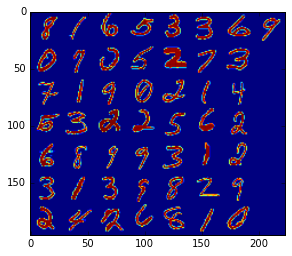

In [140]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,1000))[:,:,:50]))

In [182]:
shape(verify_train_subset[1])

(784,)

In [183]:
def check_classifier(i):
    fig, ax = subplots(figsize=(2,2))
    ax.imshow(verify_train_subset[i].reshape((28,28)))
    print clf.predict(verify_train_subset[i])

[2]
[2]
[1]


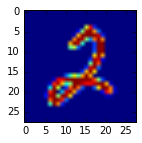

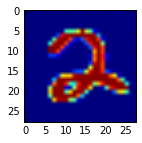

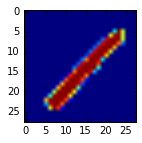

In [186]:
check_classifier(1)
check_classifier(5)
check_classifier(100)

In [170]:
shape(verify_train_subset[1])

(784,)

In [167]:
def check_classifier(i):
    fig, ax = subplots(figsize=(2,2))
    ax.imshow(train_img[:,:,i])
    print clf.predict(train_img[:,:,i].reshape(784,))

[0]
[4]
[4]
[6]
[6]
[5]


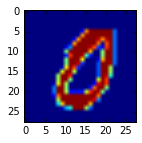

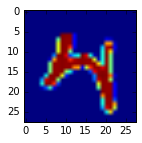

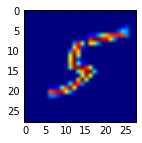

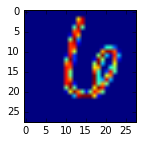

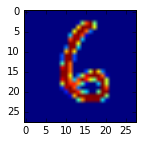

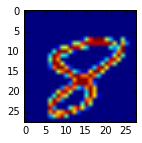

In [168]:
check_classifier(10)
check_classifier(30000)
check_classifier(35000)
check_classifier(38720)
check_classifier(41000)
check_classifier(51000)

In [187]:
result = clf.predict(verify_train_subset)
print shape(verify_labels_subset)
print shape(result)

(10000,)
(10000,)


(0, 100)

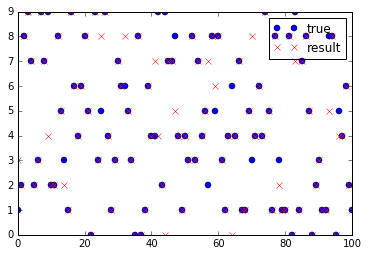

In [188]:
plt.plot(verify_labels_subset,'o',label="true")
plt.plot(result,'x',color="red",label="result")
plt.legend()
plt.xlim(0,100)

Confusion matrix:
[[ 901    0    5    4    3   11    5    9   24   10]
 [   2 1051    6   14    3    2    3    2   23    7]
 [  24   22  669   74   35   11   21   28   73    2]
 [  23   10   28  781    6   70    5   19   58   19]
 [   5    4    9    6  849    9    5   21   26   40]
 [  35   11    9   23   48  623   15   18  116   16]
 [  32   12   15    5   20   24  822    5   34    6]
 [  16   14    9   17   16    7    0  959   15   40]
 [  24   32   13   69   14   75   11    8  720   51]
 [  16    9    5   26   84   11    1  104   63  645]]


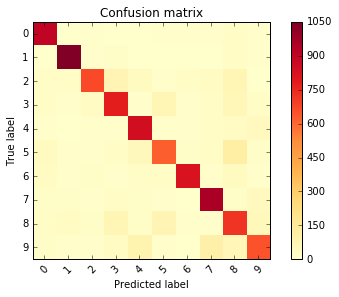

In [199]:
conf_mat = metrics.confusion_matrix(verify_labels_subset,result)
print("Confusion matrix:\n%s" % conf_mat)
plot_confusion_matrix(conf_mat)

In [189]:
error_rate = benchmark(result,verify_labels_subset)[0]
wrong_labels = benchmark(result,verify_labels_subset)[1][0]
print error_rate

0.198


In [15]:
# Code written by Kunal Marwaha on Piazza
import math
#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices
#montage_images.m, converted
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img

In [87]:
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']
def q1(N,DEBUG=False):
    #Flatten the 28x28 images into 784 pixel long vectors 
    train_img_flat=[]
    for i in np.arange(shape(train_img)[2]):
        train_img_flat.append(train_img[:,:,i].flatten())
    train_img_flat= np.array(train_img_flat)
    #get a list of 10100 unique random numbers for indexing 
#     N=1000
    num_verification = 10000
    s = set()
    while len(s) < N+num_verification:
        s.add(random.randint(60000))
    rand_idx=np.array(list(s))
    np.random.shuffle(rand_idx)
    if (DEBUG):print len(rand_idx) 
    #Creating N number of Training set/Labels 
    train_subset = []
    labels_subset = []
    for i in rand_idx[:N]:
        train_subset.append(train_img_flat[i])
        labels_subset.append(train_label[:,0][i])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
    if (DEBUG) : print shape(train_subset)
    if (DEBUG) :print shape(labels_subset)
    #Creating 10000 verification subset 
    verify_train_subset = []
    verify_labels_subset = []
    for i in rand_idx[N:num_verification+N]:
        verify_train_subset.append(train_img_flat[i])
        verify_labels_subset.append(train_label[:,0][i])
    verify_train_subset = np.array(verify_train_subset)
    verify_labels_subset = np.array(verify_labels_subset)
    if (DEBUG) : print shape(verify_train_subset)
    if (DEBUG) :print shape(verify_labels_subset)
    #Training SVM classifier
    clf = svm.SVC(kernel='linear')
    clf.fit(train_subset,labels_subset)
    result = clf.predict(verify_train_subset)
    if (DEBUG):
        plt.plot(verify_labels_subset,'o',label="true")
        plt.plot(result,'x',color="red",label="result")
        plt.legend()
        plt.xlim(0,100)
    error_rate = benchmark(result,verify_labels_subset)[0]
    wrong_labels = benchmark(result,verify_labels_subset)[1][0]
    print ("N={}".format(N))
    conf_mat = metrics.confusion_matrix(verify_labels_subset,result)
    print("Confusion matrix:\n%s" % conf_mat)
    plot_confusion_matrix(conf_mat, title="Confusion Matrix N={}".format(N))
    return error_rate

N=100
Confusion matrix:
[[ 728    0   29   14    2  173    3    4   18    0]
 [   0 1016    6   17    1    4    2    9   20   48]
 [  24  100  654   28   28   30   38   24   79   12]
 [  39   25   22  712    0  185    1   17   17   15]
 [   1   19   29    0  648   10    4   10   51  195]
 [ 114   36   14  130   33  453    5   15   28   72]
 [  75   33   78   10   85   61  591    0   25    3]
 [  13  109   12    6   15   13    1  799   58   81]
 [  41   91   36   82    6   38    7    6  548   88]
 [  14   17   20   17  113   18    0  107   38  634]]
N=200
Confusion matrix:
[[ 845    0    4   25    7   27   28    2    7    2]
 [   1 1065   12   28    4    2    2    4    8    9]
 [  20   18  725   41   20   12   56   32   61    7]
 [   6   25   37  826    2   76    7   20   34   26]
 [   3   13   49    2  701   33   10    2    2   96]
 [  36   41   23  120   70  550   20    9   34    7]
 [  32   14   78    4   35   48  784    0    4    1]
 [   4   30   28    6   24   18    1  847    3  11

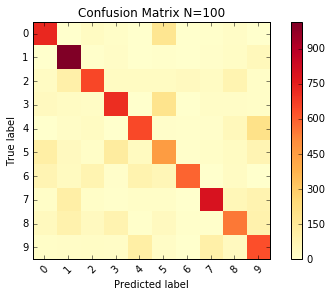

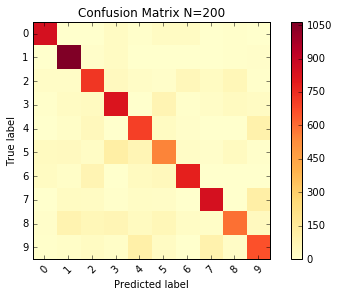

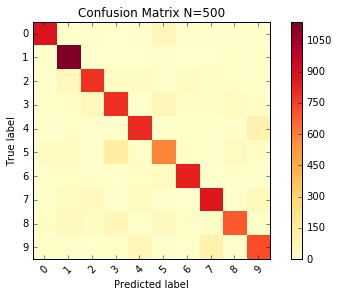

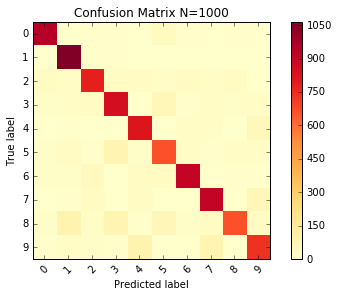

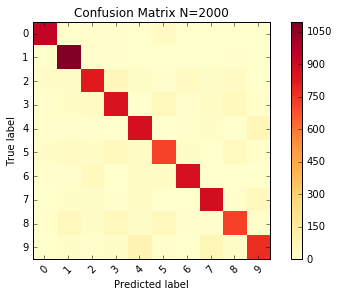

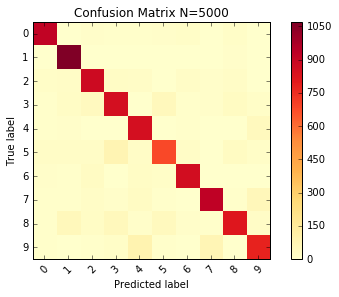

In [88]:
err_lst = []
trainset_size = [100, 200, 500, 1000, 2000, 5000]
for i in trainset_size:
    err_lst.append(q1(i))

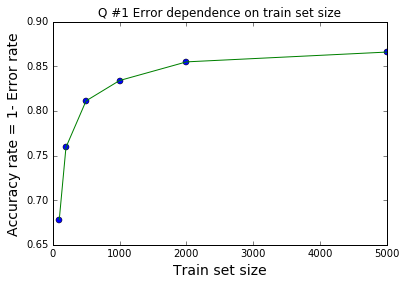

In [90]:
plt.plot(trainset_size,1-np.array(err_lst),'o')
plt.plot(trainset_size,1-np.array(err_lst),'-')
plt.xlabel("Train set size",fontsize=14)
plt.ylabel("Accuracy rate = 1- Error rate",fontsize=14)
plt.title("Q #1 Error dependence on train set size")

__Problem 2.__ Create confusion matrices2 for each experiment in Problem 1. Color code and report your results. You may use built-in implementations to generate confusion matrices. What insights can you get about the performance of your algorithm from looking at the confusion matrix?

In [86]:
from sklearn import metrics
def plot_confusion_matrix(conf_mat, title='Confusion matrix'):
    plt.figure()
    plt.imshow(conf_mat, interpolation='nearest', cmap= plt.cm.YlOrRd)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

__Problem 3.__ Explain why cross-validation helps. Implement cross- validation5 and find the optimal value of the parameter C using 10- fold cross-validation on the training set with 10,000 examples. Train a linear SVM with this value of C. Please report your C value, the validation error rate, and your Kaggle score. If you used additional features, please (briefly) describe what features you added, removed, or modified.

Cross validation is important because often we have a machine learning model that depends on some parameter that we want to tune to optimize (speed, accuracy ..etc) . So cross validation splits up our sample so that we can conduct these experiments with different values of the model parameter and then it returns a score computed from the  mean squared error that enable us to evaluate whether that is a good value to use for the model or find the best parameter that gives the most accurate result.

In [1]:
train_img_flat

NameError: name 'train_img_flat' is not defined

In [219]:
#Setting up the problem k=10-fold cross validation
N_total = 10000
data = train_img_flat[:N_total]
k=10
batch_size =shape(data)[0]/k
if (DEBUG): print batch_size
#Creating a list of 10000 random numbers
s = set()
while len(s) < N_total:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

1000


In [215]:
#Creating a gigantic array of all the training sets, grouped by each batch (fold)
mega_train_subset=[]
mega_labels_subset=[]
#Looping through each fold
for i in np.arange(k)+1:
#     print "Batch {}".format(i)
    train_subset = []
    labels_subset = []
#     print (i-1)*batch_size
#     print i*batch_size
#     print shape(rand_idx[(i-1)*batch_size:i*batch_size])
    #Merge data for each batch into one
    for idx in rand_idx[(i-1)*batch_size:i*batch_size]:
        train_subset.append(train_img_flat[idx])
        labels_subset.append(train_label[:,0][idx])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
    mega_train_subset.append(train_subset)
    mega_labels_subset.append(labels_subset)
mega_train_subset = np.array(mega_train_subset)
mega_labels_subset = np.array(mega_labels_subset)
if (DEBUG): print shape(mega_train_subset)
if (DEBUG): print shape(mega_labels_subset)

(10, 1000, 784)
(10, 1000)


In [ ]:
import sklearn.metrics
mse_lst_for_diff_C = []
C_list = [1e-5,1e-2,1,10,100,1000,1e5,1e8,1e10,1e20] 
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
        clf = svm.SVC(kernel="linear", C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
#         mse= sklearn.metrics.mean_squared_error(verify_labels, result)
        mse = 1-(benchmark(verify_labels, result)[0])
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

In [226]:
print C_list
print mse_lst_for_diff_C

[1, 10, 100, 500, 1000, 10000]
[0.89780000000000015, 0.8912000000000001, 0.89499999999999991, 0.88519999999999999, 0.8963000000000001, 0.89680000000000004]


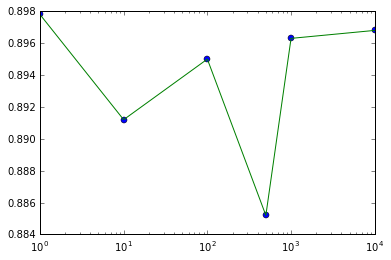

In [224]:
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

In [232]:
print C_list
print mse_lst_for_diff_C

[5, 50, 100, 100000, 500000, 1000000.0, 10000000.0]
[0.89390000000000003, 0.89920000000000011, 0.90299999999999991, 0.9010999999999999, 0.89429999999999998, 0.89539999999999986, 0.89700000000000002]


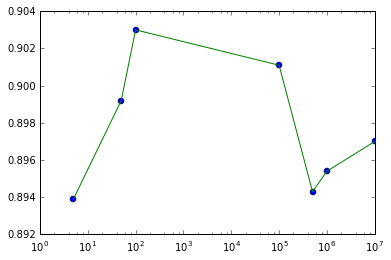

In [230]:
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

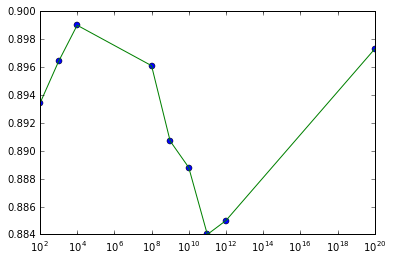

In [234]:
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

In [ ]:
C_list = [1e16,1e18,1e20,1e24,1e28,1e30,1e40,1e50,1e60,1e80]

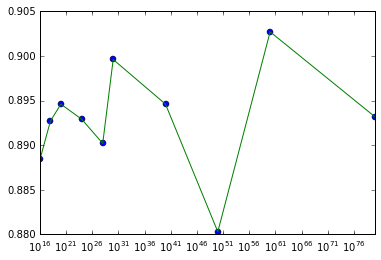

In [236]:
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

In [239]:
print C_list
print mse_lst_for_diff_C

[1e+55, 1e+75, 1e+95, 1e+100, 1e+150, 1e+200]
[0.89949999999999997, 0.89469999999999994, 0.90190000000000003, 0.89139999999999997, 0.90300000000000014, 0.88939999999999997]


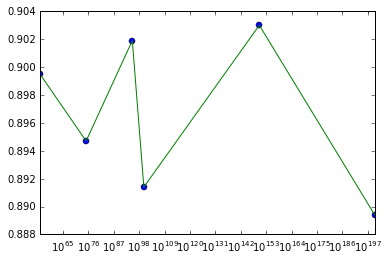

In [238]:
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

#References

- "1.4. Support Vector Machines." 1.4. Support Vector Machines — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 01 Feb. 2016.
- Markham, Kevin. "Simple Guide to Confusion Matrix Terminology." _Data School_. N.p., 25 Mar. 2014. Web. 01 Feb. 2016.
- "Confusion Matrix." Confusion Matrix — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 02 Feb. 2016.
- James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. "Chapter 5 Resampling Methods." _An Introduction to Statistical Learning: With Applications in R_. N.p.: Springer, n.d. 180-83. Print.